In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
iris = pd.read_excel("iris.xls")

In [236]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [237]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [238]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [239]:
# Checking the distribution of variables

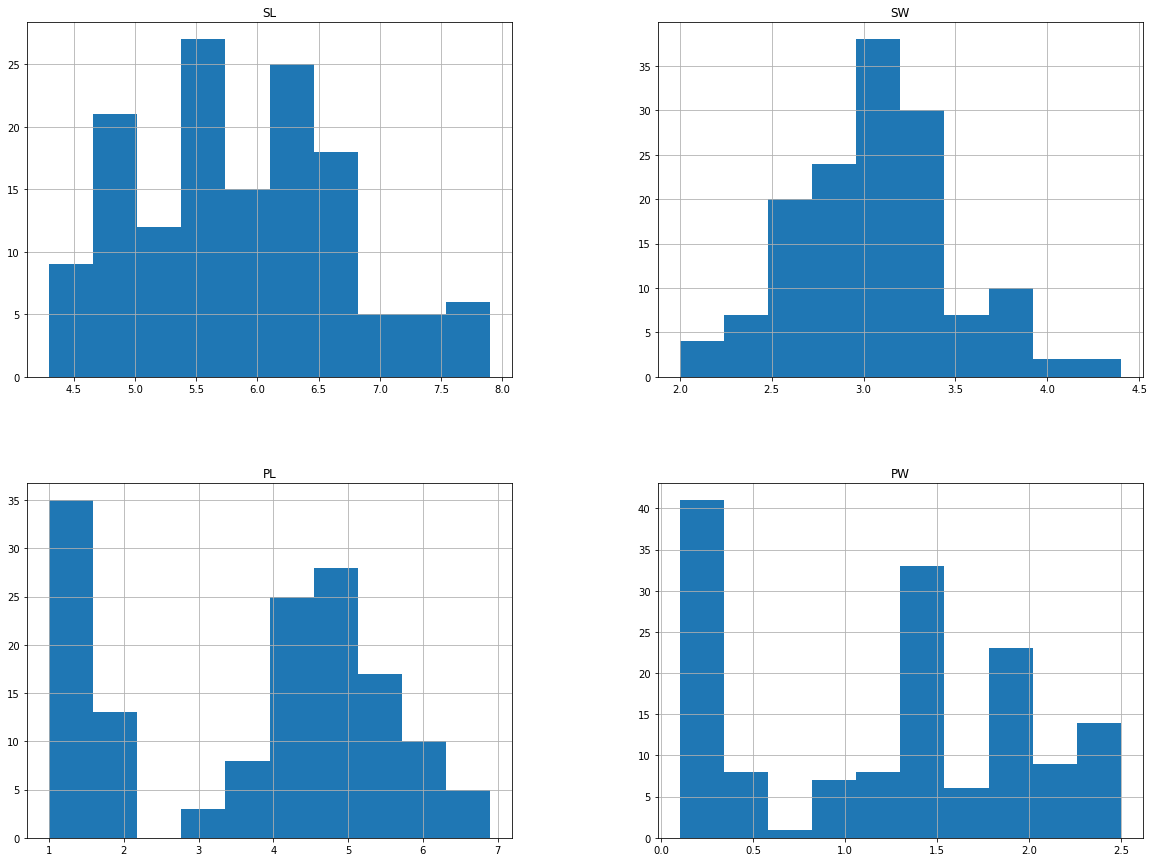

In [240]:
fg = iris.select_dtypes(include = ['float'])
fg.hist(figsize = (20,15))
plt.show()

In [241]:
# Filling the null values with mean

In [242]:
for i in ["SL", "SW", "PL"]:
    iris[i] = iris[i].fillna(iris[i].mean())

In [243]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [244]:
# One Label Encoding for Classification Column

In [245]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [246]:
iris["Classification"] = le.fit_transform(iris["Classification"])
iris
    

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [247]:
# Preprocessing

In [248]:
X = iris.drop(columns = ["Classification"])
y = iris["Classification"]

In [249]:
# Splitting and Model Building

In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [251]:
# Logestic Regression

In [252]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [253]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [255]:
print("Accuracy is :", accuracy_score(y_test, y_pred))
print("Precision is :", precision_score(y_test, y_pred,average='weighted'))
print("Recall is :", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score is :", f1_score(y_test, y_pred,average='weighted'))

Accuracy is : 0.9555555555555556
Precision is : 0.9571428571428571
Recall is : 0.9555555555555556
F1 Score is : 0.9556303778526001


In [256]:
confusion_matrix(y_test,y_pred)

array([[16,  1,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [257]:
# K-NN

In [258]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = "minkowski")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)


In [260]:
acc_values

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

Text(0, 0.5, 'accuracy')

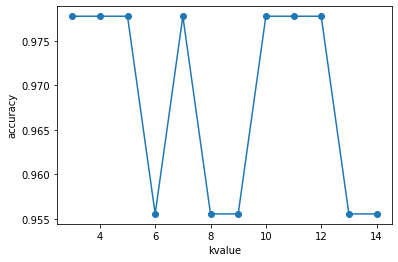

In [261]:
plt.plot(neighbors,acc_values,"o-")
plt.xlabel("kvalue")
plt.ylabel("accuracy")

In [262]:
# Changing K Value

In [263]:
classifier = KNeighborsClassifier(n_neighbors = 2,metric = "minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [264]:
print("Accuracy is :", accuracy_score(y_test, y_pred))
print("Precision is :", precision_score(y_test, y_pred,average='weighted'))
print("Recall is :", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score is :", f1_score(y_test, y_pred,average='weighted'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0


In [265]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]], dtype=int64)

In [266]:
# Decision Tree

In [267]:
from sklearn.tree import DecisionTreeClassifier
iris_model = DecisionTreeClassifier()
iris_model.fit(X_train,y_train)
y_pred = iris_model.predict(X_test)

In [268]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.9555555555555556
Precision is : 0.9555555555555556
Recall is : 0.9555555555555556
F1 is : 0.9555555555555556


In [269]:
y_test.value_counts()

0    17
1    15
2    13
Name: Classification, dtype: int64

In [270]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 12]], dtype=int64)

In [271]:
#SVM

In [272]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

In [273]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9793650793650793
Recall is : 0.9777777777777777
F1 is : 0.9778061586490706


In [274]:
#Polynomial SVM

In [275]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

In [276]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9793650793650793
Recall is : 0.9777777777777777
F1 is : 0.9778061586490706


In [277]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [278]:
#Random Forest

In [279]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [280]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9793650793650793
Recall is : 0.9777777777777777
F1 is : 0.9778061586490706


In [281]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In K-NN Method we got maximum Accuracy,Precision and F1 value(when changing n_neighbors value to 2 from graph).
So we can prefer K-NN as a good preference.